# Exercises

In [1]:
# 1. The following is a dataset of patients who have tested positive or negative for COVID-19. 
# Their symptoms are cough (C), fever (F), difficulty breathing (B), and tiredness (T).

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron

data = {
    "Cough (C)":      [1, 1, 1, 1, 1, 0, 0, 0],
    "Fever (F)":      [1, 1, 1, 1, 0, 1, 1, 0],
    "Breathing (B)":  [0, 1, 1, 1, 1, 1, 0, 1],
    "Tiredness (T)":  [1, 1, 1, 0, 1, 0, 0, 1],
    "Diagnosis (D)":  ["Sick", "Sick", "Sick", "Sick", "Healthy", "Healthy", "Healthy", "Healthy"]
}

df = pd.DataFrame(data, index=[f"Patient {i+1}" for i in range(8)])

features = df.drop("Diagnosis (D)", axis=1).to_numpy()
y_raw = df["Diagnosis (D)"].to_numpy()

le = LabelEncoder()
labels = le.fit_transform(y_raw)


In [2]:
model = Perceptron(max_iter=1000, tol=None, random_state=0)
model.fit(features, labels)

# Coeficientes
intercept = model.intercept_[0]
coefficients = model.coef_[0]
feature_names = df.drop("Diagnosis (D)", axis=1).columns

equation = " + ".join([f"{coef:.2f}*{name}" for coef, name in zip(coefficients, feature_names)])
equation = f"{equation} + {intercept:.2f} = 0"
print("Ecuación del perceptrón:")
print(equation)

Ecuación del perceptrón:
4.00*Cough (C) + 3.00*Fever (F) + -1.00*Breathing (B) + 0.00*Tiredness (T) + -4.00 = 0


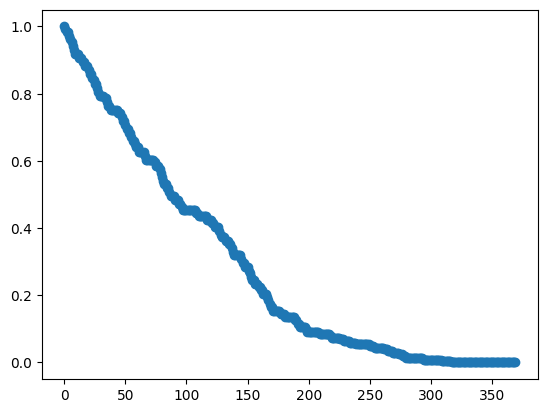

weights: [np.float64(0.5799999999999996), np.float64(0.6099999999999997), np.float64(0.09999999999999924), np.float64(0.3499999999999994)], bias: -1.0400000000000007
result: [ 0.5  -0.33 -0.01 -1.04]


In [ ]:
import sys
sys.path.append('../../../../src')
import perceptron
import numpy as np

weights, bias = perceptron.perceptron_algorithm(features, labels, 0.01, 370)

tests =  np.array([
          [1, 1, 0, 1],  # Cough, Fever, No Breathing, Tiredness
          [0, 1, 1, 0],  # No Cough, Fever, Breathing, No Tiredness
          [1, 0, 1, 1],  # Cough, No Fever, Breathing, Tiredness
          [0, 0, 0, 0]])  # No symptoms

result = tests.dot(weights) + bias
print(f"weights: {weights}, bias: {bias}")
print(f"result: {result}")



In [27]:
# Exercise 5.2

# Consider the perceptron model that assigns to the point (x1, x2) the prediction ŷ = step(2x1 + 3x2 – 4). This model has as a boundary line with equation 2x1 + 3x2 – 4 = 0. 
# We have the point p = (1, 1) with label 0.

weights = np.array([2, 3])
bias = -4
p = np.array([1, 1])

# 1. Verify that the point p is misclassified by the model.
score = perceptron.score(weights, bias, p)
predict = perceptron.step(score)
print(f"Score at point p: {score}, Prediction: {predict}")

# 2. Calculate the perceptron error that the model produces at the point p.
error = perceptron.error(weights, bias, p, 0)
print(f"Error: {error}")
# 3. Use the perceptron trick to obtain a new model that still misclassifies p but produces a smaller error.
#  You can use η = 0.01 as the learning rate.
p_weights, p_bias = perceptron.perceptron_trick(weights, bias, p, 0, 0.01)
print(f"weights: {p_weights}, bias: {p_bias}")
# 4. Find the prediction given by the new model at the point p, 
# and verify that the perceptron error obtained is smaller than the original.
score2 = perceptron.score(p_weights, p_bias, p)
predict2 = perceptron.step(score2)
print(f"New Score at point p: {score2}, New Prediction: {predict2}")
error2 = perceptron.error(p_weights, p_bias, p, 0)
print(f"Error: {error2}")


Score at point p: 1, Prediction: 1
Error: 1
weights: [1 2], bias: -4.01
New Score at point p: -1.0099999999999998, New Prediction: 0
Error: 0


In [38]:
def sklearn_perceptron(features, labels):
    model_and_sklearn = Perceptron(max_iter=1000, tol=1e-3, random_state=0)
    model_and_sklearn.fit(features, labels)
    coefficients_skilearn = model_and_sklearn.coef_[0]
    intercept_skilearn = model_and_sklearn.intercept_[0]
    mean_error_sklearn = perceptron.mean_perceptron_error(
        coefficients_skilearn,
        intercept_skilearn,
        np.array(features),
        np.array(labels)
    )
    predict = model_and_sklearn.predict(dataToTest)

    print(f"Sklearn Model AND gate weights: {coefficients_skilearn}, bias: {intercept_skilearn}")
    print(f"Sklearn Model AND Mean Perceptron Error: {mean_error_sklearn}")
    print(f"Sklearn Model AND Predictions: {predict}")

def manual_perceptron(features, labels):
    weights, bias = model_and_manual = perceptron.perceptron_algorithm(np.array(features), np.array(labels), 0.01, 1000)
    mean_perceptron_error = perceptron.mean_perceptron_error(weights, bias, np.array(features), np.array(labels))
    predicts = [perceptron.prediction(weights, bias, x) for x in dataToTest]

    print(f"Manual Model AND gate weights: {weights}, bias: {bias}")
    print(f"Manual Model AND Mean Perceptron Error: {mean_perceptron_error}")
    print(f"Manual Model AND Predictions: {predicts}")




Sklearn Model AND gate weights: [2. 2.], bias: -2.0
Sklearn Model AND Mean Perceptron Error: 0.0
Sklearn Model AND Predictions: [0 0 1 0]


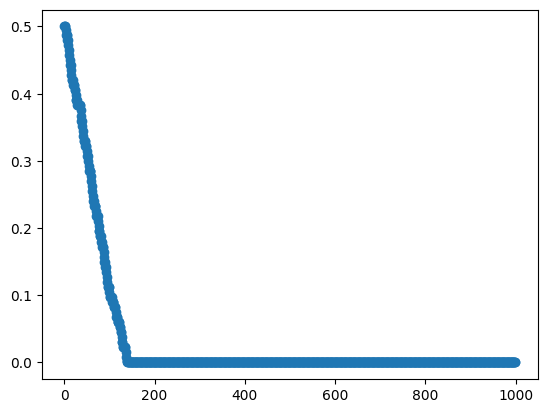

Manual Model AND gate weights: [np.float64(0.6599999999999997), np.float64(0.6699999999999997)], bias: -0.6800000000000004
Manual Model AND Mean Perceptron Error: 0.0
Manual Model AND Predictions: [0, 0, 1, 0]


In [39]:
# Exercise 5.3
# 1. Build a perceptron that models the AND gate. In other words, build a perceptron to fit the following dataset (where x1, x2 are the features and y is the label):

features = [[0, 0], [0, 1], [1, 0], [1, 1]]
labels = [0, 0, 0, 1]
dataToTest = np.array([[1, 0], [0, 1], [1, 1], [0, 0]])
sklearn_perceptron(features, labels)
manual_perceptron(features, labels)

Sklearn Model AND gate weights: [2. 2.], bias: -1.0
Sklearn Model AND Mean Perceptron Error: 0.0
Sklearn Model AND Predictions: [1 1 1 0]


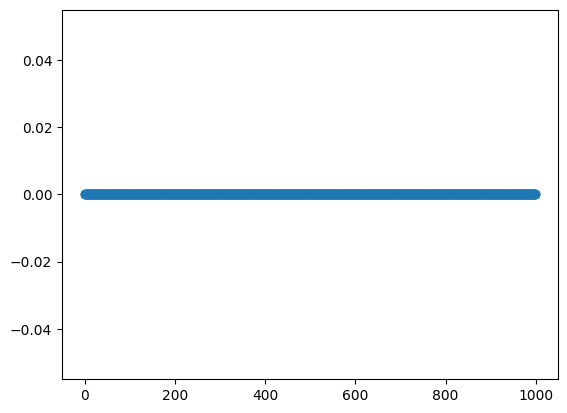

Manual Model AND gate weights: [np.float64(1.0), np.float64(1.0)], bias: -0.01
Manual Model AND Mean Perceptron Error: 0.0
Manual Model AND Predictions: [1, 1, 1, 0]


In [40]:
# Exercise 5.3
# 2. Similarly, build a perceptron that models the OR gate, given by the following dataset:

features = [[0, 0], [0, 1], [1, 0], [1, 1]]
labels = [0, 1, 1, 1]
dataToTest = np.array([[1, 0], [0, 1], [1, 1], [0, 0]])
sklearn_perceptron(features, labels)
manual_perceptron(features, labels)

Sklearn Model AND gate weights: [0. 0.], bias: 0.0
Sklearn Model AND Mean Perceptron Error: 0.0
Sklearn Model AND Predictions: [0 0 0 0]


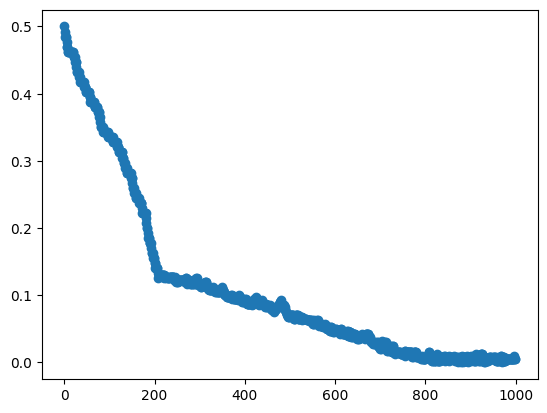

Manual Model AND gate weights: [np.float64(0.019999999999999248), np.float64(0.009999999999999247)], bias: 0.010000000000000087
Manual Model AND Mean Perceptron Error: 0.012499999999999666
Manual Model AND Predictions: [1, 1, 1, 1]


In [41]:
# Exercise 5.3
# 3. Show that there is no perceptron that models the XOR gate, given by the following dataset:

features = [[0, 0], [0, 1], [1, 0], [1, 1]]
labels = [0, 1, 1, 0]
dataToTest = np.array([[1, 0], [0, 1], [1, 1], [0, 0]])
sklearn_perceptron(features, labels)
manual_perceptron(features, labels)

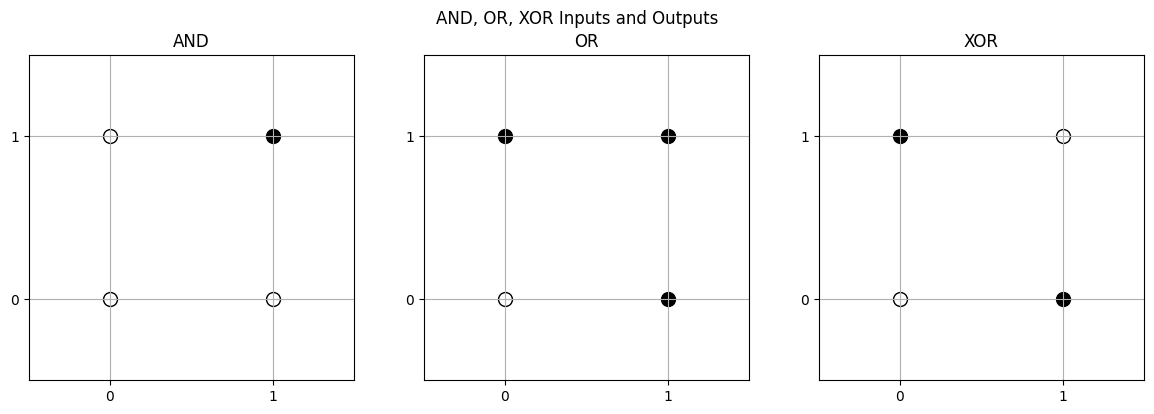

In [42]:
import matplotlib.pyplot as plt

# Definimos los puntos para las compuertas lógicas
points = {
    "AND": [(0, 0, 0), (0, 1, 0), (1, 0, 0), (1, 1, 1)],
    "OR":  [(0, 0, 0), (0, 1, 1), (1, 0, 1), (1, 1, 1)],
    "XOR": [(0, 0, 0), (0, 1, 1), (1, 0, 1), (1, 1, 0)]
}

# Crear subplots para los gráficos superiores
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for ax, (logic, values) in zip(axs, points.items()):
    for x, y, label in values:
        color = 'black' if label == 1 else 'white'
        edgecolor = 'black'
        ax.scatter(x, y, c=color, edgecolors=edgecolor, s=100)
        ax.set_xlim(-0.5, 1.5)
        ax.set_ylim(-0.5, 1.5)
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_title(logic)
        ax.set_aspect('equal')
        ax.grid(True)

fig.suptitle("AND, OR, XOR Inputs and Outputs")
plt.tight_layout()
plt.show()

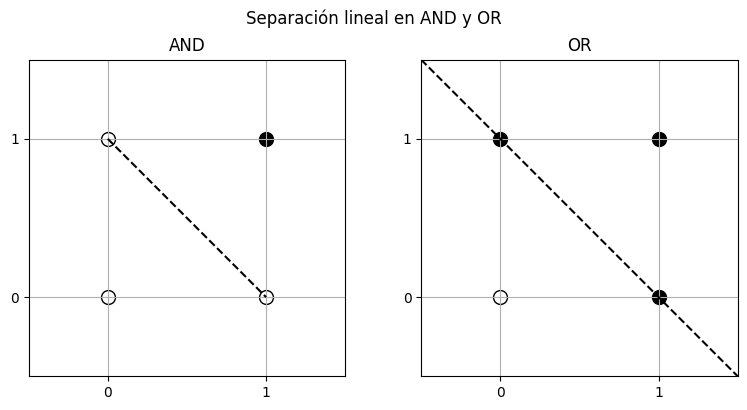

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Datos para AND
and_points = points["AND"]
for x, y, label in and_points:
    color = 'black' if label == 1 else 'white'
    axs[0].scatter(x, y, c=color, edgecolors='black', s=100)
axs[0].plot([0, 1], [1, 0], 'k--')  # línea de separación
axs[0].set_title("AND")
axs[0].set_xlim(-0.5, 1.5)
axs[0].set_ylim(-0.5, 1.5)
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_aspect('equal')
axs[0].grid(True)

# Datos para OR
or_points = points["OR"]
for x, y, label in or_points:
    color = 'black' if label == 1 else 'white'
    axs[1].scatter(x, y, c=color, edgecolors='black', s=100)
axs[1].plot([-0.5, 1.5], [1.5, -0.5], 'k--')  # línea de separación
axs[1].set_title("OR")
axs[1].set_xlim(-0.5, 1.5)
axs[1].set_ylim(-0.5, 1.5)
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_aspect('equal')
axs[1].grid(True)

fig.suptitle("Separación lineal en AND y OR")
plt.tight_layout()
plt.show()